In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from csv import reader
from sklearn.metrics import accuracy_score

seed = 42
np.random.seed(seed)

In [2]:
#Store the data set
df = pd.read_csv('diabetes.csv')
#Look at first 7 rows of data
df.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [3]:
#Show the shape (number of rows & columns)
df.shape

(768, 9)

In [4]:
#Checking for duplicates and removing them
df.drop_duplicates(inplace = True)

In [5]:
#Show the shape to see if any rows were dropped 
df.shape

(768, 9)

In [6]:
#Show the number of missing (NAN, NaN, na) data for each column
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
#Convert the data into an array
dataset = df.values
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [8]:
# Correlation Matrix for classification Data 
correlation_matrix = df.corr()
print('Classification Data Correlation Matrix:\n', correlation_matrix)

Classification Data Correlation Matrix:
                           Pregnancies   Glucose  ...       Age   Outcome
Pregnancies                  1.000000  0.129459  ...  0.544341  0.221898
Glucose                      0.129459  1.000000  ...  0.263514  0.466581
BloodPressure                0.141282  0.152590  ...  0.239528  0.065068
SkinThickness               -0.081672  0.057328  ... -0.113970  0.074752
Insulin                     -0.073535  0.331357  ... -0.042163  0.130548
BMI                          0.017683  0.221071  ...  0.036242  0.292695
DiabetesPedigreeFunction    -0.033523  0.137337  ...  0.033561  0.173844
Age                          0.544341  0.263514  ...  1.000000  0.238356
Outcome                      0.221898  0.466581  ...  0.238356  1.000000

[9 rows x 9 columns]


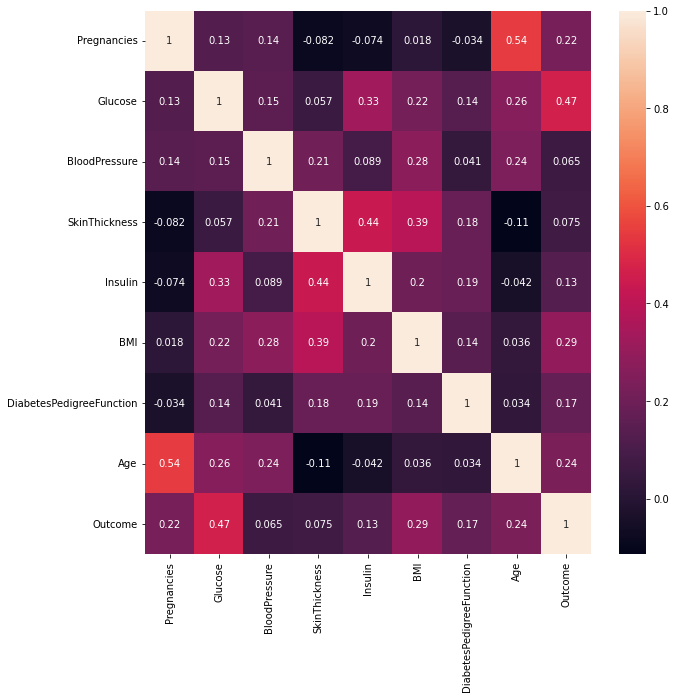

In [9]:
#plotting the Correlation Matrix
plt.figure(figsize=(10, 10))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

# **Data Pre-processing**

Split the data into an independent / feature data set X and a dependent / target data set y

In [10]:
# Get all of the rows from the first eight columns of the dataset
X = dataset[:,0:8] 
# Get all of the rows from the last column
y = dataset[:,8] 

Process the feature data set to contain values between 0 and 1 inclusive, by using the min-max scaler method, and print the values

In [11]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [12]:
print("Shape of Target matrix",X_scale.shape)

Shape of Target matrix (768, 8)


Split the data again but this time into 60% training, 20% Validation and 20% testing data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state = 4)

# Splitting in way of 60% Training, 20% Validation and 20% Testing
# train_x -> Training set (60%)
# test_val_x -> Validation Set (20%)
# test_x -> Testing Set (20%)
train_r_x, test_val_x, train_r_y, test_val_y = train_test_split(X_train, y_train, test_size=0.25, random_state=4)

# **Part 1: Implement Logistic Regression**

In [14]:
#Inverse the shape of X as, we need to multiply X with W.T
#Inverse the output Y, as output of X of order '1 x n' with W.T order 'n x m' will be '1 x m'
train_r_x = train_r_x.T
train_r_y = train_r_y.T

test_val_x = test_val_x.T
test_val_y = test_val_y.T

X_test = X_test.T
y_test = y_test.T

In [15]:
# Weights and Bias Parameters initialize and sigmoid function
# Weights as numpy array filled with 1's
# Bias assigned to 0 
def init_w_and_b(dim):
    weight = np.full((dim,1),0.01)
    bias = 0.0
    return weight,bias

def sigmoid(z):
    return 1 / (1+np.exp(-z))

**Equations :**

z = $\sigma ( W^T*X + b ) $ ........ (probabilistic predictions of shape (1 x m ) )

$\sigma = \frac{1}{(1 + e^{-x})}  $ ......... (sigmoid function)


**Cost function :** 

$ cost = - \frac{1}{m} \sum_{i=1}^m [ y*log(a) + (1 - y)*log(1 - a) ] $


**Gradient Descent**

$dW = \frac{\partial COST }{\partial W} = ( A - Y )*X^T $ ...... shape (1 x n)

$dB = \frac{\partial COST }{\partial B} = ( A - Y ) $



In [16]:
#Forward & Backward Propagation method to find gradient, loss and the cost function
def f_b_prop(weight,bias,train_x,train_y):
    z = np.dot(weight.T,train_x) + bias
    A_func = sigmoid(z)
    loss_value = -train_y*np.log(A_func) - (1-train_y)*np.log(1-A_func)
    total_cost = (np.sum(loss_value)) / train_x.shape[1]
    
    #backward propogation
    d_w = (np.dot(train_x,((A_func-train_y).T)))/train_x.shape[1]
    d_b = np.sum(A_func-train_y)/train_x.shape[1]
    gradients_value = {"derivative_weight": d_w,"derivative_bias": d_b}
    return total_cost,gradients_value

Find Cost and Gradients by Forward and Backward propagation, and then update Weight and Bias

$W = W - \alpha * dW^T $

$B = B - \alpha * dB $

Now, we make prediction (pred_value) based on  $\sigma ( W^T*X + b ) $ 

If the Sigmoid function value is less than 0.5, then we make Prediction as 0
else if it is greater than 0.5, then we make prediction as 1

In [17]:
#Prediction
def prediction(weight,bias,test_x):
    # test_x is a input for forward propagation
    z = sigmoid(np.dot(weight.T,test_x)+bias)
    pred_value = np.zeros((1,test_x.shape[1]))
    # if z is bigger than threshold, our prediction is one means has diabete (A=1),
    # if z is smaller than threshold, our prediction is zero means does not have diabete (A=0),
    # Ideally, the threshold would be 0.5 (for high accuracy)
    for i in range(z.shape[1]):
        if z[0,i] <= 0.5:
            pred_value[0,i] = 0
        else:
            pred_value[0,i] = 1

    return pred_value

In [18]:
# Updating (Learning) Parameters
    
def update(weight, bias, train_x, train_y, l_r, n_iterarion, test_x, test_y):
    cost1 = []
    cost2 = []
    index = []
    acc = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(n_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost_value,gradients_value = f_b_prop(weight,bias,train_x,train_y)
        cost1.append(cost_value)
        # now update weights and bias
        weight = weight - l_r * gradients_value["derivative_weight"]
        bias = bias - l_r * gradients_value["derivative_bias"]
        if i % 10 == 0:
            cost2.append(cost_value)
            index.append(i)
            # print ("Cost after iteration %i: %f" %(i, cost_value))
            # calculating accuracy
            y_pred_test = prediction(weight, bias, test_x)
            # Print train/test Errors
            print("test accuracy: {} %".format(100 - np.mean(np.abs(y_pred_test - test_y)) * 100))
            acc.append(100 - np.mean(np.abs(y_pred_test - test_y)) * 100)
    # we update(learn) parameters weights and bias
    params = {"weight": weight,"bias": bias}
    plt.plot(index,cost2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost Value")
    plt.show()

    plt.plot(index,acc)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy")
    plt.show()
    return params, gradients_value, cost1

In [19]:
def logistic_regression(train_x, train_y, test_x, test_y, l_r, n_iterarions):
    # initialize
    dim =  train_x.shape[0]
    weight,bias = init_w_and_b(dim)

    params, gradients_value, cost1 = update(weight, bias, train_x, train_y, l_r, n_iterarions, test_x, test_y)
    
    y_pred_test = prediction(params["weight"], params["bias"], test_x)
    
    # Print train/test Errors
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_pred_test - test_y)) * 100))

**Logistic regression using Validation dataset**

test accuracy: 69.48051948051949 %
test accuracy: 69.48051948051949 %
test accuracy: 69.48051948051949 %
test accuracy: 69.48051948051949 %
test accuracy: 71.42857142857143 %
test accuracy: 70.77922077922078 %
test accuracy: 71.42857142857143 %
test accuracy: 74.02597402597402 %
test accuracy: 75.97402597402598 %
test accuracy: 75.97402597402598 %
test accuracy: 76.62337662337663 %
test accuracy: 76.62337662337663 %
test accuracy: 75.97402597402598 %
test accuracy: 74.02597402597402 %
test accuracy: 74.02597402597402 %
test accuracy: 75.32467532467533 %
test accuracy: 75.32467532467533 %
test accuracy: 74.67532467532467 %
test accuracy: 74.67532467532467 %
test accuracy: 74.67532467532467 %
test accuracy: 74.67532467532467 %
test accuracy: 74.67532467532467 %
test accuracy: 74.67532467532467 %
test accuracy: 75.32467532467533 %
test accuracy: 75.32467532467533 %
test accuracy: 75.32467532467533 %
test accuracy: 75.32467532467533 %
test accuracy: 75.32467532467533 %
test accuracy: 75.32

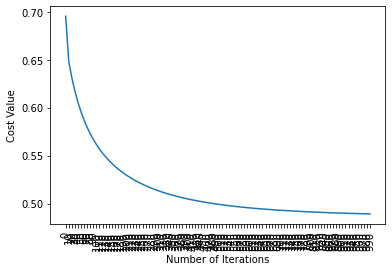

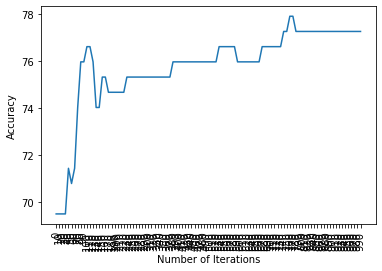

test accuracy: 77.27272727272728 %


In [20]:
logistic_regression(train_r_x, train_r_y, test_val_x, test_val_y, l_r = 1.2, n_iterarions = 1000)

**Logistic regression using Testing dataset**

test accuracy: 66.23376623376623 %
test accuracy: 66.23376623376623 %
test accuracy: 65.58441558441558 %
test accuracy: 68.83116883116884 %
test accuracy: 71.42857142857143 %
test accuracy: 72.72727272727273 %
test accuracy: 75.32467532467533 %
test accuracy: 77.92207792207792 %
test accuracy: 78.57142857142857 %
test accuracy: 79.22077922077922 %
test accuracy: 79.22077922077922 %
test accuracy: 79.22077922077922 %
test accuracy: 79.87012987012987 %
test accuracy: 79.87012987012987 %
test accuracy: 79.87012987012987 %
test accuracy: 79.22077922077922 %
test accuracy: 78.57142857142857 %
test accuracy: 78.57142857142857 %
test accuracy: 79.87012987012987 %
test accuracy: 79.87012987012987 %
test accuracy: 79.87012987012987 %
test accuracy: 79.87012987012987 %
test accuracy: 79.87012987012987 %
test accuracy: 80.51948051948051 %
test accuracy: 80.51948051948051 %
test accuracy: 80.51948051948051 %
test accuracy: 79.87012987012987 %
test accuracy: 79.87012987012987 %
test accuracy: 79.87

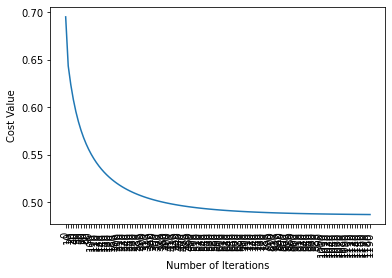

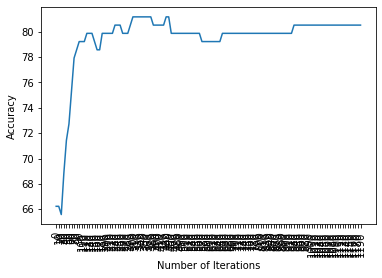

test accuracy: 80.51948051948051 %


In [21]:
logistic_regression(train_r_x, train_r_y, X_test, y_test, l_r = 1.5, n_iterarions = 1200)

# **Part 2: Implement Neural Networks**

In [22]:
# Imports
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import regularizers

In [23]:
# Reverting the testing data set
train_r_x = train_r_x.T
train_r_y = train_r_y.T

X_test = X_test.T
y_test = y_test.T

In [24]:
NB_EPOCHS = 1000  # num of epochs to test for
BATCH_SIZE = 32

## Create our model
model = Sequential()

# 1st layer: input_dim=8, 12 nodes, RELU
model.add(Dense(12, activation='relu', kernel_regularizer=regularizers.l1(0.01), input_shape=(8,))) #Regularization parameter used for penalty (λ) = 0.01
# 2nd layer: 15 nodes, RELU
model.add(Dense(15, activation='relu', kernel_regularizer=regularizers.l2(0.01))) #Regularization parameter (λ) = 0.01
# output layer: dim=1, activation sigmoid
model.add(Dense(1, activation='sigmoid'))

In [25]:
opt = SGD(learning_rate=0.01) #learning rate = 0.01
model.compile(optimizer=opt, 
              loss='binary_crossentropy', # since we are predicting 0/1
              metrics=['accuracy'])

In [26]:
h = model.fit(X_train, y_train,
          batch_size=BATCH_SIZE, epochs=NB_EPOCHS, validation_split=0.2)

Epoch 1/1000
16/16 [==============================] - 1s 13ms/step - loss: 1.0885 - accuracy: 0.3890 - val_loss: 1.0758 - val_accuracy: 0.5285
Epoch 2/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.0707 - accuracy: 0.5764 - val_loss: 1.0643 - val_accuracy: 0.6423
Epoch 3/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.0603 - accuracy: 0.6375 - val_loss: 1.0536 - val_accuracy: 0.6585
Epoch 4/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.0510 - accuracy: 0.6558 - val_loss: 1.0463 - val_accuracy: 0.6341
Epoch 5/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.0440 - accuracy: 0.6558 - val_loss: 1.0396 - val_accuracy: 0.6423
Epoch 6/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.0377 - accuracy: 0.6538 - val_loss: 1.0335 - val_accuracy: 0.6341
Epoch 7/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.0321 - accuracy: 0.6497 - val_loss: 1.0283 - val_accuracy: 0.6423
Epoch

In [27]:
h_test = model.fit(train_r_x, train_r_y,
          batch_size=BATCH_SIZE, epochs=NB_EPOCHS, validation_data=(X_test, y_test), verbose=0)

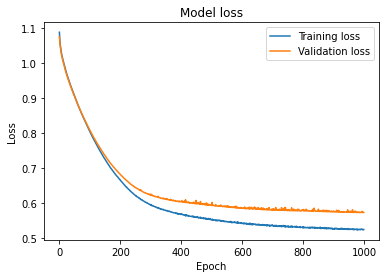

In [28]:
#visualize the training loss and the validation loss to see if the model is overfitting
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.show()

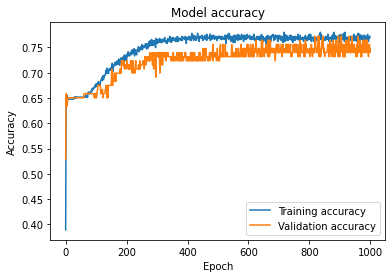

In [29]:
#visualize the training accuracy and the validation accuracy to see if the model is overfitting
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training accuracy', 'Validation accuracy'], loc='lower right')
plt.show()

**Evaluate the model on the testing data set**

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
mod_pred = model.predict(X_test)
mod_pred  = [1 if y>=0.5 else 0 for y in mod_pred] #Threshold
print(classification_report(y_test,mod_pred))
print('Confusion Matrix: \n',confusion_matrix(y_test,mod_pred))
print()
print('Accuracy: ', accuracy_score(y_test,mod_pred)*100, '%')
print()

              precision    recall  f1-score   support

         0.0       0.82      0.91      0.87       102
         1.0       0.78      0.62      0.69        52

    accuracy                           0.81       154
   macro avg       0.80      0.76      0.78       154
weighted avg       0.81      0.81      0.81       154

Confusion Matrix: 
 [[93  9]
 [20 32]]

Accuracy:  81.16883116883116 %



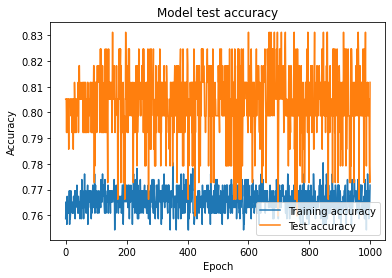

In [31]:
#visualize the training accuracy and the validation accuracy to see if the model is overfitting
plt.plot(h_test.history['accuracy'])
plt.plot(h_test.history['val_accuracy'])
plt.title('Model test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training accuracy', 'Test accuracy'], loc='lower right')
plt.show()

# **Part 3: Implement different regularization methods for the Neural Networks**

# Regularization method : **Dropout**

In [32]:
# Imports
from keras.layers.core import Dropout

In [33]:
NB_EPOCHS = 1000  # num of epochs to test for
BATCH_SIZE = 32

## Create our model
model_drop = Sequential()

# 1st layer: input_dim=8, 12 nodes, RELU
model_drop.add(Dense(12, activation='relu', input_shape=(8,)))
model_drop.add(Dropout(0.15)) #Probability of dropping = 0.15

# 2nd layer: 15 nodes, RELU
model_drop.add(Dense(15, activation='relu'))
model_drop.add(Dropout(0.15)) #Probability of dropping = 0.15

# output layer: dim=1, activation sigmoid
model_drop.add(Dense(1, activation='sigmoid'))

In [34]:
opt = SGD(learning_rate=0.01) #learning rate = 0.01
model_drop.compile(optimizer=opt, 
              loss='binary_crossentropy', # since we are predicting 0/1
              metrics=['accuracy'])

In [35]:
h_drop = model_drop.fit(X_train, y_train,
          batch_size=BATCH_SIZE, epochs=NB_EPOCHS, validation_split=0.2)

Epoch 1/1000
16/16 [==============================] - 1s 10ms/step - loss: 0.7032 - accuracy: 0.4603 - val_loss: 0.6901 - val_accuracy: 0.5041
Epoch 2/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.5092 - val_loss: 0.6802 - val_accuracy: 0.6585
Epoch 3/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.6831 - accuracy: 0.6008 - val_loss: 0.6737 - val_accuracy: 0.6585
Epoch 4/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.6090 - val_loss: 0.6681 - val_accuracy: 0.6585
Epoch 5/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.6751 - accuracy: 0.6375 - val_loss: 0.6636 - val_accuracy: 0.6585
Epoch 6/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.6730 - accuracy: 0.6497 - val_loss: 0.6610 - val_accuracy: 0.6504
Epoch 7/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.6497 - val_loss: 0.6586 - val_accuracy: 0.6504
Epoch

In [36]:
h_drop_test = model_drop.fit(train_r_x, train_r_y,
          batch_size=BATCH_SIZE, epochs=NB_EPOCHS, validation_data=(X_test, y_test), verbose=0)

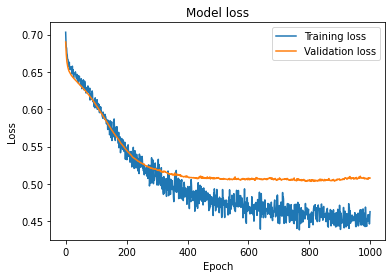

In [37]:
#visualize the training loss and the validation loss to see if the model is overfitting
plt.plot(h_drop.history['loss'])
plt.plot(h_drop.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.show()

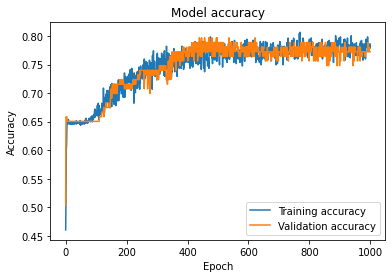

In [38]:
#visualize the training accuracy and the validation accuracy to see if the model is overfitting
plt.plot(h_drop.history['accuracy'])
plt.plot(h_drop.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training accuracy', 'Validation accuracy'], loc='lower right')
plt.show()

**Evaluate the model on the testing data set**

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
mod_pred = model_drop.predict(X_test)
mod_pred  = [1 if y>=0.5 else 0 for y in mod_pred] #Threshold
print(classification_report(y_test,mod_pred))
print('Confusion Matrix: \n',confusion_matrix(y_test,mod_pred))
print()
print('Accuracy: ', accuracy_score(y_test,mod_pred)*100, '%')
print()

              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83       102
         1.0       0.66      0.71      0.69        52

    accuracy                           0.78       154
   macro avg       0.75      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154

Confusion Matrix: 
 [[83 19]
 [15 37]]

Accuracy:  77.92207792207793 %



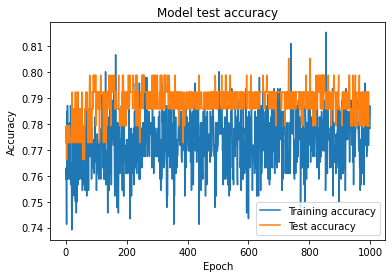

In [40]:
#visualize the training accuracy and the validation accuracy to see if the model is overfitting
plt.plot(h_drop_test.history['accuracy'])
plt.plot(h_drop_test.history['val_accuracy'])
plt.title('Model test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training accuracy', 'Test accuracy'], loc='lower right')
plt.show()

# Regularization method : **L2**

In [41]:
NB_EPOCHS = 1000  # num of epochs to test for
BATCH_SIZE = 32

## Create our model
model_l2 = Sequential()

# 1st layer: input_dim=8, 12 nodes, RELU
model_l2.add(Dense(12, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(8,))) #Regularization parameter used for penalty (λ) = 0.01
# 2nd layer: 15 nodes, RELU
model_l2.add(Dense(15, activation='relu', kernel_regularizer=regularizers.l2(0.01))) #Regularization parameter (λ) = 0.01
# output layer: dim=1, activation sigmoid
model_l2.add(Dense(1, activation='sigmoid'))

In [42]:
opt = SGD(learning_rate=0.01) #learning rate = 0.01
model_l2.compile(optimizer=opt, 
              loss='binary_crossentropy', # since we are predicting 0/1
              metrics=['accuracy'])

In [43]:
h_l2 = model_l2.fit(X_train, y_train,
          batch_size=BATCH_SIZE, epochs=NB_EPOCHS, validation_split=0.2)

Epoch 1/1000
16/16 [==============================] - 1s 10ms/step - loss: 0.9509 - accuracy: 0.4440 - val_loss: 0.9470 - val_accuracy: 0.5203
Epoch 2/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9435 - accuracy: 0.5927 - val_loss: 0.9396 - val_accuracy: 0.6504
Epoch 3/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9365 - accuracy: 0.6415 - val_loss: 0.9334 - val_accuracy: 0.6504
Epoch 4/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9306 - accuracy: 0.6477 - val_loss: 0.9278 - val_accuracy: 0.6504
Epoch 5/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9254 - accuracy: 0.6477 - val_loss: 0.9224 - val_accuracy: 0.6504
Epoch 6/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.9204 - accuracy: 0.6477 - val_loss: 0.9177 - val_accuracy: 0.6504
Epoch 7/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9159 - accuracy: 0.6477 - val_loss: 0.9137 - val_accuracy: 0.6504
Epoch

In [44]:
h_l2_test = model_l2.fit(train_r_x, train_r_y,
          batch_size=BATCH_SIZE, epochs=NB_EPOCHS, validation_data=(X_test, y_test), verbose=0)

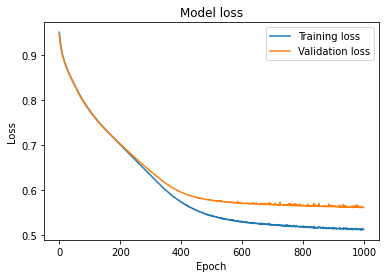

In [45]:
#visualize the training loss and the validation loss to see if the model is overfitting
plt.plot(h_l2.history['loss'])
plt.plot(h_l2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.show()

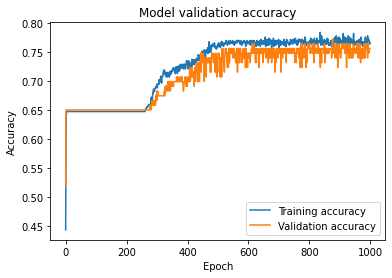

In [46]:
#visualize the training accuracy and the validation accuracy to see if the model is overfitting
plt.plot(h_l2.history['accuracy'])
plt.plot(h_l2.history['val_accuracy'])
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training accuracy', 'Validation accuracy'], loc='lower right')
plt.show()

**Evaluate the model on the testing data set**

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
mod_pred = model_l2.predict(X_test)
mod_pred  = [1 if y>=0.5 else 0 for y in mod_pred] #Threshold
print(classification_report(y_test,mod_pred))
print('Confusion Matrix: \n',confusion_matrix(y_test,mod_pred))
print()
print('Accuracy: ', accuracy_score(y_test,mod_pred)*100, '%')
print()

              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       102
         1.0       0.71      0.67      0.69        52

    accuracy                           0.80       154
   macro avg       0.78      0.77      0.77       154
weighted avg       0.80      0.80      0.80       154

Confusion Matrix: 
 [[88 14]
 [17 35]]

Accuracy:  79.87012987012987 %



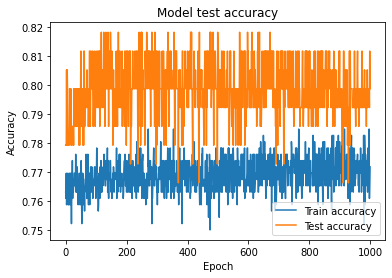

In [48]:
#visualize the training accuracy and the validation accuracy to see if the model is overfitting
plt.plot(h_l2_test.history['accuracy'])
plt.plot(h_l2_test.history['val_accuracy'])
plt.title('Model test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Test accuracy'], loc='lower right')
plt.show()

# Comparison between Dropout and L2 regularizations

•	Though both methods (Dropout and L2) are used to reduce over-fitting, there is difference in execution and usage.


•	The main idea of dropout is to randomly drop the neurons during the training so that the model doesn’t overly depend upon the neurons for the output.


•	Dropout method provides higher predictive accuracy than L2 for larger networks, but for smaller networks like our case, L2 regularization yields better results.


•	Comparing the above model results, we can see L2 regularization yielded slightly better accuracy than dropout.